<a href="https://colab.research.google.com/github/matthewprk/comparing-baltimore-and-chicago-employment-rates-based-on-parent-income-using-PYTHON/blob/main/BAL_CHI_ER_byPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Looking at Baltimore and Chicago Employment Rates Based on Parent Income



*   How does employment rate and parent income differ for each city?
*   Is any parent-income group driving employment for either city? 



## Import Libraries

In [126]:
# For Data Analysis

import pandas as pd
import numpy as np

# For Visualizations

import plotly.express as px

# For Exporting Files

from google.colab import files

# For Linear Regression
from sklearn import linear_model

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

In [127]:
# For Datasets

## 2019 Baltimore Employment - Parent Income ALL
df_BAL_ALL=pd.read_csv("https://raw.githubusercontent.com/matthewprk/comparing-baltimore-and-chicago-employment-rates-based-on-parent-income-using-PYTHON/main/BaltimoreEmployment_All_PI.csv")
## 2019 Baltimore Employment - Parent Income HIGH
df_BAL_HIGH=pd.read_csv("https://raw.githubusercontent.com/matthewprk/comparing-baltimore-and-chicago-employment-rates-based-on-parent-income-using-PYTHON/main/BaltimoreEmployment_High_PI.csv")
## 2019 Baltimore Employment - Parent Income MEDIUM
df_BAL_MED=pd.read_csv("https://raw.githubusercontent.com/matthewprk/comparing-baltimore-and-chicago-employment-rates-based-on-parent-income-using-PYTHON/main/BaltimoreEmployment_Med_PI.csv")
## 2019 Baltimore Employment - Parent Income LOW
df_BAL_LOW=pd.read_csv("https://raw.githubusercontent.com/matthewprk/comparing-baltimore-and-chicago-employment-rates-based-on-parent-income-using-PYTHON/main/BaltimoreEmployment_Low_PI.csv")
## 2019 Chicago Employment - Parent Income ALL
df_CHI_ALL=pd.read_csv("https://raw.githubusercontent.com/matthewprk/comparing-baltimore-and-chicago-employment-rates-based-on-parent-income-using-PYTHON/main/ChicagoEmployment_All_PI.csv")
## 2019 Chicago Employment - Parent Income HIGH
df_CHI_HIGH=pd.read_csv("https://raw.githubusercontent.com/matthewprk/comparing-baltimore-and-chicago-employment-rates-based-on-parent-income-using-PYTHON/main/ChicagoEmployment_High_PI.csv")
## 2019 Chicago Employment - Parent Income MEDIUM
df_CHI_MED=pd.read_csv("https://raw.githubusercontent.com/matthewprk/comparing-baltimore-and-chicago-employment-rates-based-on-parent-income-using-PYTHON/main/ChicagoEmployment_Med_PI.csv")
## 2019 Chicago Employment - Parent Income LOW
df_CHI_LOW=pd.read_csv("https://raw.githubusercontent.com/matthewprk/comparing-baltimore-and-chicago-employment-rates-based-on-parent-income-using-PYTHON/main/ChicagoEmployment_Low_PI.csv")

# Merge Data

## Merging Parent Income Datasets for each City

In [128]:
# Merging Baltimore Datasets

## MERGING BALTIMORE DATASETS

df_BAL_merge1=pd.merge(df_BAL_ALL,df_BAL_HIGH[["tract","Employment_Rate_rP_gP_p75"]],how="left",on="tract")

## Merging Merge1 with Medium

df_BAL_merge2=pd.merge(df_BAL_merge1,df_BAL_MED[["tract","Employment_Rate_rP_gP_p50"]],how="left",on="tract")

## Merging Merge2 with Low to derive Final merged Baltimore dataset

df_BAL_mergeFINAL=pd.merge(df_BAL_merge2,df_BAL_LOW[["tract","Employment_Rate_rP_gP_p25"]],how="left",on="tract")

# MERGING CHICAGO DATASETS

## Mergine All with High

df_CHI_merge3=pd.merge(df_CHI_ALL,df_CHI_HIGH[["tract","Employment_Rate_rP_gP_p75"]],how="left",on="tract")

## Merging Merge3 with Medium

df_CHI_merge4=pd.merge(df_CHI_merge3,df_CHI_MED[["tract","Employment_Rate_rP_gP_p50"]],how="left",on="tract")

## Merging Merge4 with Low to derive Final merged CHICAGO dataset

df_CHI_mergeFINAL=pd.merge(df_CHI_merge4,df_CHI_LOW[["tract","Employment_Rate_rP_gP_p25"]],how="left",on="tract")

## Rename Employment Columns 

In [129]:
# Renaming Baltimore Employment Columns

df_BAL_mergeFINAL=df_BAL_mergeFINAL.rename(columns={"Employment_Rate_rP_gP_p75":"Employment Rate High PI",
                                  "Employment_Rate_rP_gP_p50":"Employment Rate Medium PI",
                                  "Employment_Rate_rP_gP_p25":"Employment Rate Low PI",
                                  "Employment_Rate_rP_gP_pall":"Employment Rate All PI"})

In [130]:
# Renaming Chicago Employment Columns

df_CHI_mergeFINAL=df_CHI_mergeFINAL.rename(columns={"Employment_Rate_rP_gP_p75":"Employment Rate High PI",
                                  "Employment_Rate_rP_gP_p50":"Employment Rate Medium PI",
                                  "Employment_Rate_rP_gP_p25":"Employment Rate Low PI",
                                  "Employment_Rate_rP_gP_pall":"Employment Rate All PI"})

# Filtering Data

In [131]:
# Filter Only Baltimore City Data

df_BAL_filtered1=df_BAL_mergeFINAL[df_BAL_mergeFINAL['Name'].str.contains('Baltimore')]

# Remove rows with 'NaN' data

df_BAL_filteredFINAL=df_BAL_filtered1.dropna()

In [132]:
# Filter Only Chicago Data

df_CHI_filtered1=df_CHI_mergeFINAL[df_CHI_mergeFINAL['Name'].str.contains('Chicago')]

# Remove rows with 'NaN' data

df_CHI_filteredFINAL=df_CHI_filtered1.dropna()

In [133]:
# Add City column for the Baltimore Only Data

df_BAL_filteredFINAL['City']='Baltimore'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
# Add City Column for the Chicago Only Data

df_CHI_filteredFINAL['City']='Chicago'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Plotting Data


## Plotly Express

In [135]:
# Average Employment Rate for Baltimore and Chicago

employment_bar = px.bar(df_pivot_merge, x='City',y='Employment Rate All PI', width=600, height=700, title='Average Employment Rate for All Parent Incomes')

In [136]:
# Preview

employment_bar

## Pivot Tables

In [137]:
# Average Employment in Baltimore City by Parent Income

df_pivot_baltimore = pd.pivot_table(df_BAL_filteredFINAL,
                                    index='City',
                                    values=['Employment Rate All PI','Employment Rate High PI','Employment Rate Medium PI','Employment Rate Low PI'],
                                            aggfunc = np.mean).reset_index()

In [138]:
# Preview 

df_pivot_baltimore.head()

,City,Employment Rate All PI,Employment Rate High PI,Employment Rate Low PI,Employment Rate Medium PI
0,Baltimore,0.720127,0.788615,0.696969,0.749796


In [139]:
# Average Employment in Chicago by Parent Income

df_pivot_chicago = pd.pivot_table(df_CHI_filteredFINAL,
                                  index='City',
                                  values=['Employment Rate All PI','Employment Rate High PI','Employment Rate Medium PI','Employment Rate Low PI'],
                                            aggfunc = np.mean).reset_index()

In [140]:
# Preview

df_pivot_chicago.head()

,City,Employment Rate All PI,Employment Rate High PI,Employment Rate Low PI,Employment Rate Medium PI
0,Chicago,0.745009,0.802098,0.720805,0.767686


In [141]:
# Merge Pivot Tables

df_pivot_merge = pd.concat([df_pivot_baltimore,df_pivot_chicago], axis=0)

In [142]:
# Preview

df_pivot_merge.head()

,City,Employment Rate All PI,Employment Rate High PI,Employment Rate Low PI,Employment Rate Medium PI
0,Baltimore,0.720127,0.788615,0.696969,0.749796
0,Chicago,0.745009,0.802098,0.720805,0.767686


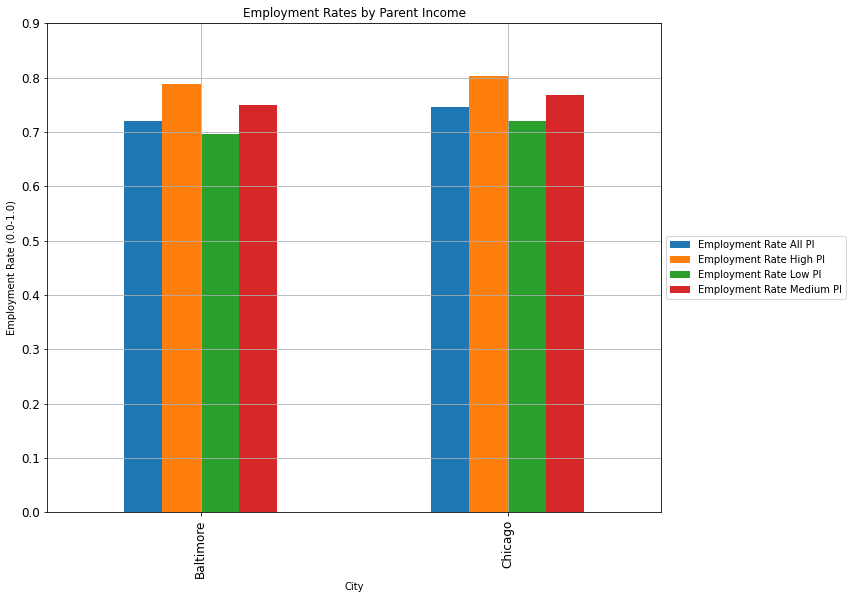

In [143]:
# Pivot Chart Comparing Baltimore and Chicago

mergedbar=df_pivot_merge.plot(kind='bar',
                    x='City',
                    title='Employment Rates by Parent Income',
                    ylabel='Employment Rate (0.0-1.0)',
                    fontsize=12, grid='yes', figsize=(11,9),ylim=(0,0.9))
mergedbar.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Linear Regression

In [149]:
# Baltimore Linear Regression

X=df_BAL_filteredFINAL[['Employment Rate High PI','Employment Rate Medium PI','Employment Rate Low PI']]
Y=df_BAL_filteredFINAL['Employment Rate All PI']

# With sklearn

regr=linear_model.LinearRegression()
regr.fit(X,Y)

# Derive Intercept and Coefficients

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# NOTE THAT WE DO NOT KNOW IF THESE ARE STATISTICALLY SIGNIFICANT

Intercept: 
 0.059184801174730683
Coefficients: 
 [ 31.19126488 -53.41324203  23.11733124]


In [150]:
# Chicago Linear Regression

X=df_CHI_filteredFINAL[['Employment Rate High PI','Employment Rate Medium PI','Employment Rate Low PI']]
Y=df_CHI_filteredFINAL['Employment Rate All PI']

# With sklearn

regr=linear_model.LinearRegression()
regr.fit(X,Y)

# Derive Intercept and Coefficients

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# NOTE THAT WE DO NOT KNOW IF THESE ARE STATISTICALLY SIGNIFICANT

Intercept: 
 0.13979911041292126
Coefficients: 
 [ 0.66398154 -0.52025928  0.65486212]
